In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
import time
from itertools import combinations

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import torch

## Load the Data

In [3]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_7/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_7/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Output
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047
5,0.764919,0.255883,0.609084,0.218079,0.322943,0.095794,0.083747
6,0.057896,0.491672,0.247422,0.218118,0.420428,0.730970,1.364968
7,0.195252,0.079227,0.554580,0.170567,0.014944,0.107032,0.092645
8,0.642303,0.836875,0.021793,0.101488,0.683071,0.692416,0.017870
9,0.789943,0.195545,0.575623,0.073659,0.259049,0.051100,0.033565


In [4]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Input_5':0.111111,'Input_6':0.111111,'Output':0.08866875}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.05,0.55,0.15,0.25,0.45,0.75,0.943570620362295]
df.loc[len(df)] = new_data

new_data=[0.25,0.25,0.45,0.25,0.35,0.75,2.88587654038395]
df.loc[len(df)] = new_data

# 14 may
df.loc[len(df)]=[0.25,0.166667,0.333334,0.25,0.25,0.916666,1.76820368675416]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,9.99999e-01,1.00000e-06,9.99999e-01,1.00000e-06,0.00614332749291892]
df.loc[len(df)]=[0.25,0.333334,0.333334,0.333334,0.333334,0.75,2.54652630892653]

# 17 may
df.loc[len(df)]=[0.166667,0.166667,0.5,0.416667,0.416667,0.75,2.1810638752945573]

# 20 may
df.loc[len(df)]=[0.3,0.2,0.4,0.25,0.35,0.65,3.04345639514518]
df.loc[len(df)]=[0.35,0.35,0.55,0.3,0.35,0.8,2.2456574932562]

# 2 JUN
df.loc[len(df)]=[0.275,0.275,0.4625,0.2375,0.275,0.6125,2.93355747455889]

# 13 jun
df.loc[len(df)]=[0.245833,0.245833,0.429167,0.245833,0.383333,0.6125,2.865715993]
df.loc[len(df)]=[0.666667,0.5,0.333333,0.333333,0.999999,0.75,0.009849774]

# 17 jun
df.loc[len(df)]=[0.319231,0.265385,0.373077,0.157692,0.319231,0.642308,2.56188257018027]
df.loc[len(df)]=[0.319231,0.211538,0.426923,0.265385,0.319231,0.696154,3.07231839008328]

# 22 jun
df.loc[len(df)]=[0.254167,0.2,0.4,0.325,0.25,0.654167,2.99159267766697]

# 24 jun
df.loc[len(df)]=[0.354166,0.2,0.466667,0.333333,0.325,0.633334,2.9292728044748]

# 28 jun
df.loc[len(df)]=[0.286667,0.216666,0.440001,0.2775,0.304167,0.673333,3.17614208562762]
df.loc[len(df)]=[0.265,0.154167,0.463334,0.246666,0.304167,0.655,3.24417332391201] #**max

# 1 jul
df.loc[len(df)]=[0.300001,0.133334,0.5325,0.205001,0.3225,0.65,3.01868787807641]
df.loc[len(df)]=[0.283334,0.150001,0.4975,0.223334,0.305,0.65,3.15078010886609]

# 6 jul
df.loc[len(df)]=[0.23077,0.153847,0.461539,0.23077,0.307693,0.692307,3.21692362965081]

# 9 jul
df.loc[len(df)]=[0.240001,0.13,0.438,0.244,0.316,0.656667,3.25534344807664] #**max

# 13 jul
df.loc[len(df)]=[0.237334,0.14,0.443334,0.249333,0.306666,0.66,3.27405216113519] #*new max

# 15 jul
df.loc[len(df)]=[0.226667,0.14,0.452667,0.249333,0.306666,0.652,3.28539342729927] #*new max

# 20 jul
df.loc[len(df)]=[0.205334,0.14,0.462,0.249333,0.306666,0.644,3.29248025824026] #*new max

#Print
df_orig=df
df

,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Output
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047
5,0.764919,0.255883,0.609084,0.218079,0.322943,0.095794,0.083747
6,0.057896,0.491672,0.247422,0.218118,0.420428,0.730970,1.364968
7,0.195252,0.079227,0.554580,0.170567,0.014944,0.107032,0.092645
8,0.642303,0.836875,0.021793,0.101488,0.683071,0.692416,0.017870
9,0.789943,0.195545,0.575623,0.073659,0.259049,0.051100,0.033565


In [5]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4    Input_5    Input_6  \
count  55.000000  55.000000  55.000000  55.000000  55.000000  55.000000   
mean    0.395686   0.331957   0.410883   0.393073   0.423245   0.555512   
std     0.268651   0.235200   0.253425   0.269433   0.270502   0.247088   
min     0.000001   0.011813   0.003635   0.000001   0.014944   0.000001   
25%     0.226507   0.151924   0.253015   0.229781   0.264714   0.406279   
50%     0.286667   0.255883   0.429167   0.265385   0.322943   0.650000   
75%     0.636260   0.490242   0.516250   0.514297   0.593918   0.720049   
max     0.942451   0.999999   0.999999   0.961017   0.999999   0.951014   

          Output  
count  55.000000  
mean    1.246828  
std     1.360056  
min     0.002701  
25%     0.051771  
50%     0.516457  
75%     2.907575  
max     3.292480  


In [6]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_7/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_7/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Output
0,0.553392,0.942657,0.378440,0.816450,0.307241,0.686673,0.019226
1,0.577679,0.776667,0.491674,0.810940,0.257392,0.311188,0.363302
2,0.599499,0.870323,0.078620,0.877470,0.448571,0.140321,0.554079
3,0.343912,0.162373,0.647475,0.333062,0.589852,0.348620,0.503286
4,0.250251,0.502581,0.865295,0.394841,0.576682,0.227583,0.378579
5,0.380412,0.492180,0.163437,0.345015,0.002492,0.727430,0.351421
6,0.700038,0.247925,0.996856,0.788169,0.421235,0.241108,0.021838
7,0.272153,0.362294,0.147924,0.989290,0.617245,0.905756,0.002742
8,0.985963,0.565510,0.033647,0.818355,0.064730,0.291007,0.002845
9,0.105575,0.530669,0.709730,0.387130,0.377642,0.687453,1.420618


In [7]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Output
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047
...,...,...,...,...,...,...,...
80,0.749896,0.773160,0.936798,0.674506,0.410118,0.529218,0.048036
81,0.179062,0.977801,0.342306,0.927041,0.354412,0.356218,0.089280
82,0.201310,0.206148,0.769688,0.334296,0.487436,0.131516,0.192033
83,0.191597,0.252712,0.390953,0.229106,0.363287,0.861946,2.114691


# Function 7

### You are now optimising six hyper-parameters of a machine learning model. Note that it is a popular and frequently used model, so maybe you could search to see if anyone else has optisized it before?

## Data exploration

In [10]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4    Input_5    Input_6  \
count  85.000000  85.000000  85.000000  85.000000  85.000000  85.000000   
mean    0.403586   0.393341   0.432146   0.468931   0.435946   0.522445   
std     0.264053   0.265133   0.268736   0.287570   0.267461   0.262394   
min     0.000001   0.011813   0.003635   0.000001   0.002492   0.000001   
25%     0.226667   0.166667   0.247422   0.246666   0.264514   0.311188   
50%     0.319231   0.338344   0.429167   0.333334   0.354412   0.633704   
75%     0.642303   0.550000   0.575623   0.761906   0.589852   0.714687   
max     0.985963   0.999999   0.999999   0.991040   0.999999   0.951014   

          Output  
count  85.000000  
mean    0.936544  
std     1.208788  
min     0.002150  
25%     0.047646  
50%     0.273047  
75%     1.768204  
max     3.292480  

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Input_4    0
Input_5    0
Input_6    0
Output     0
dty

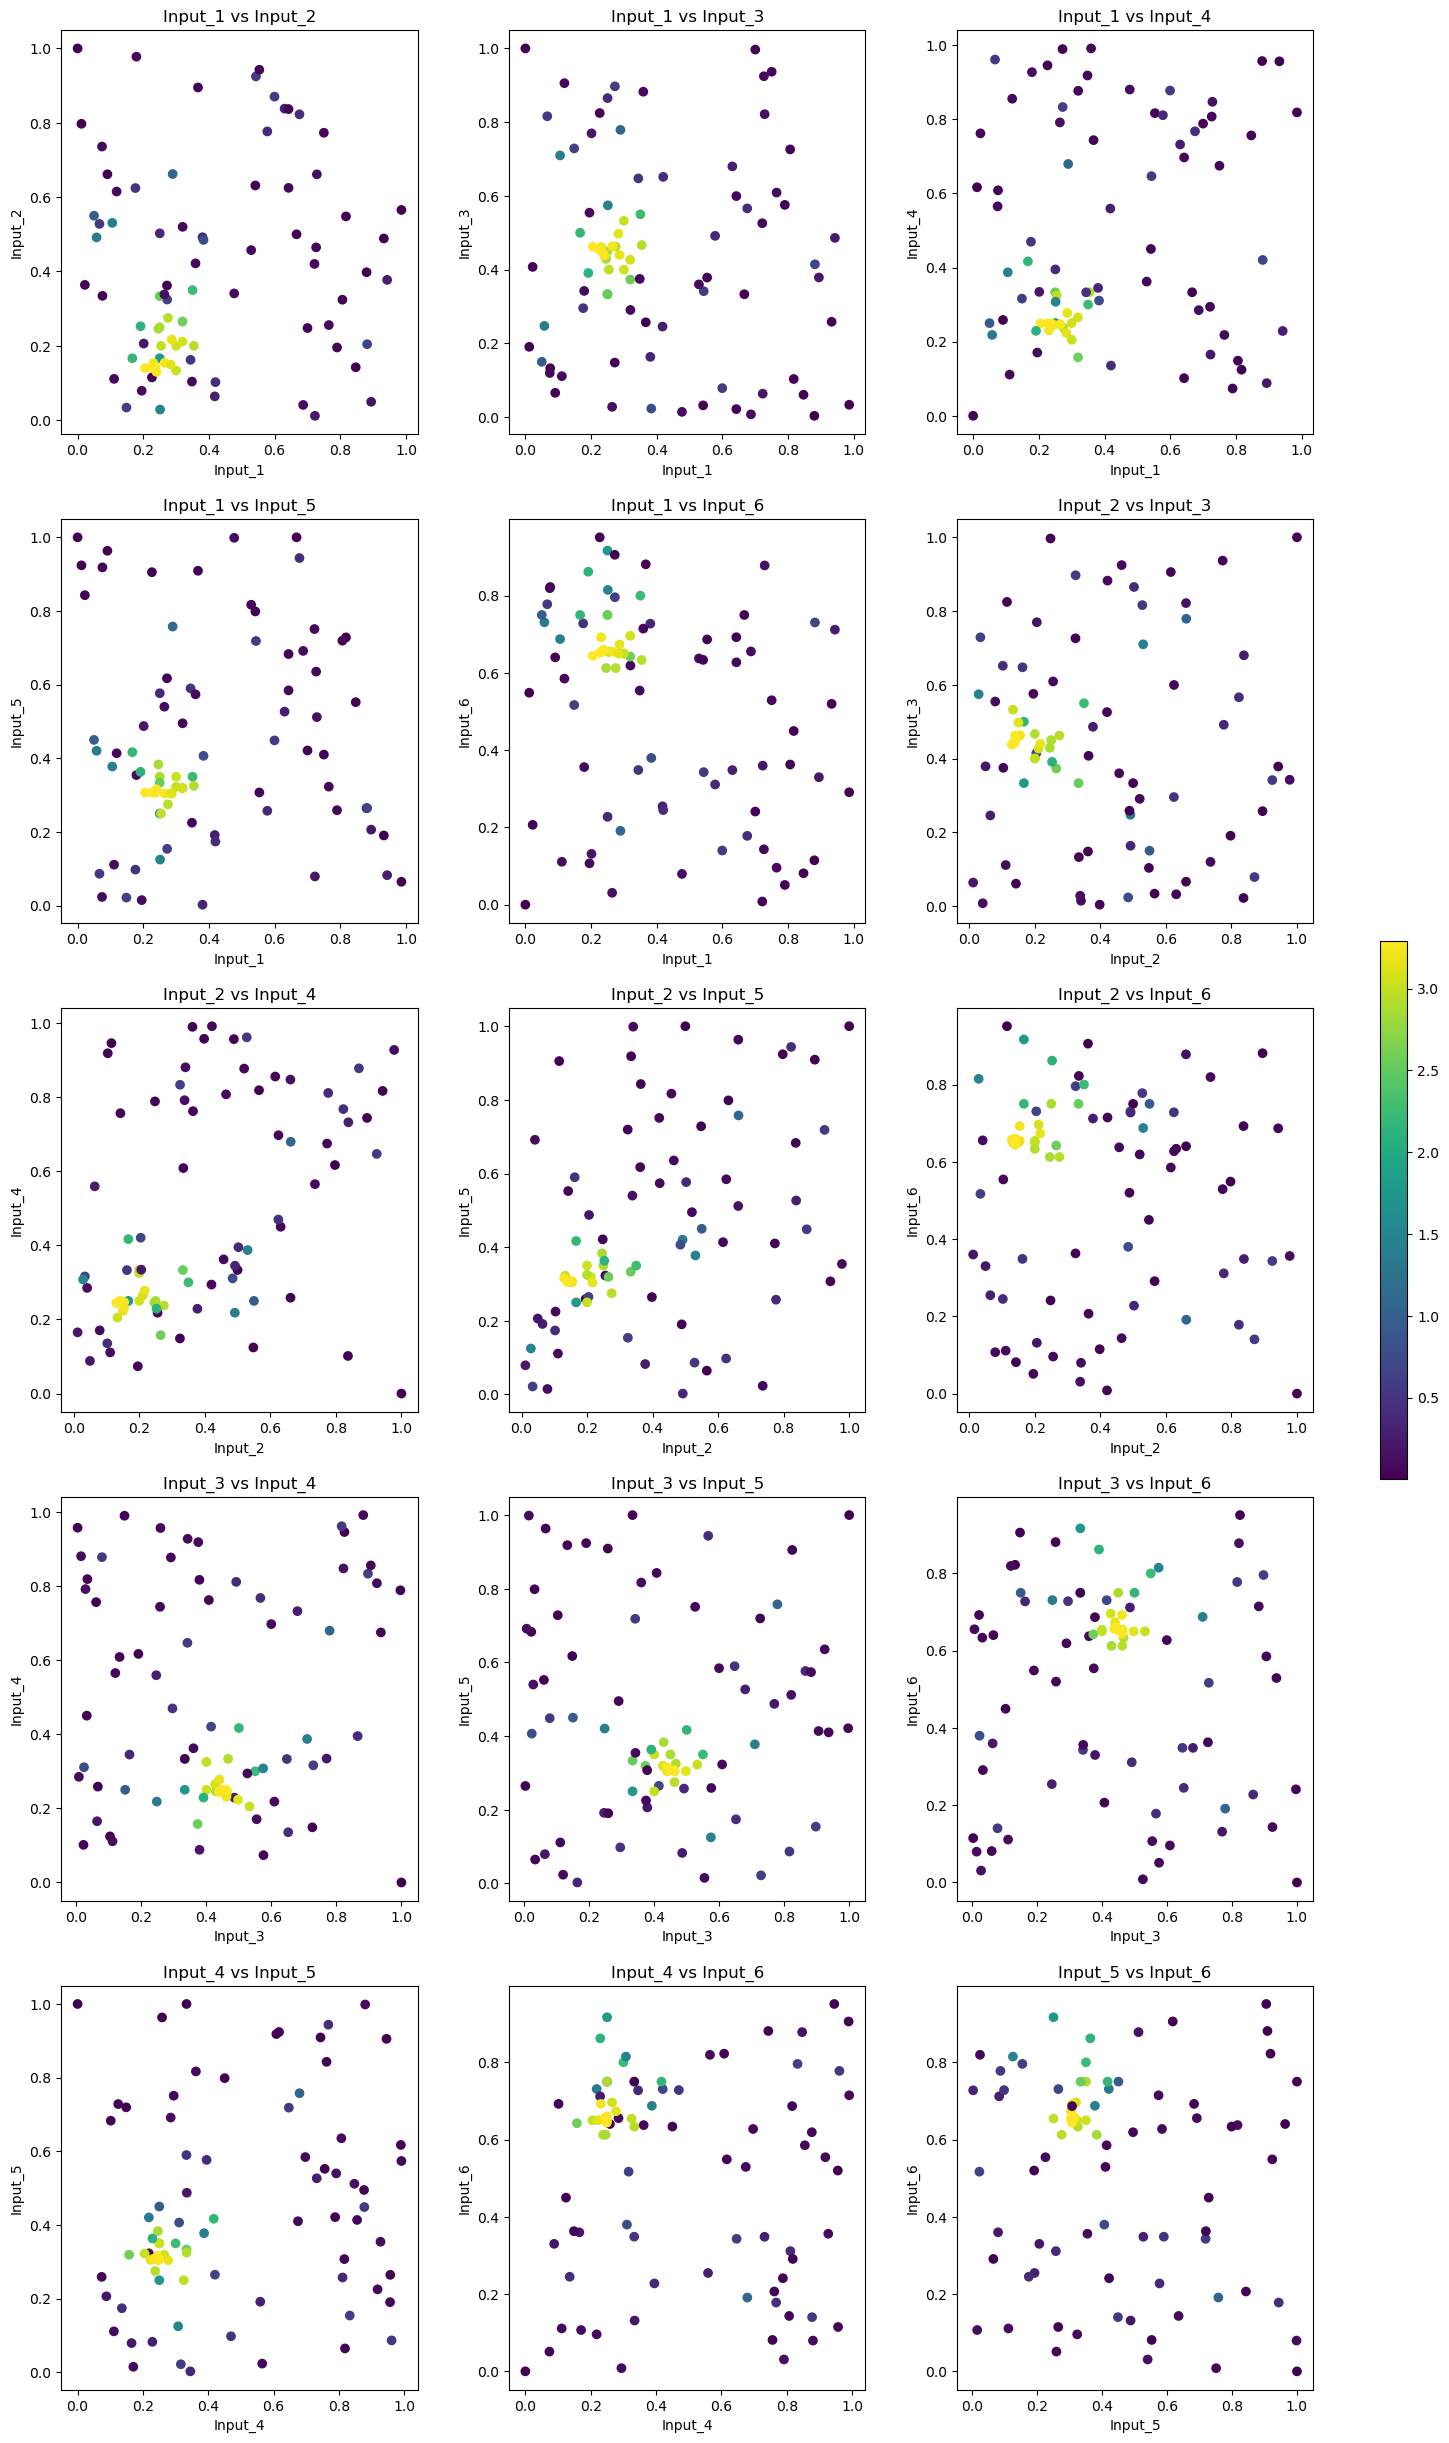

In [11]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

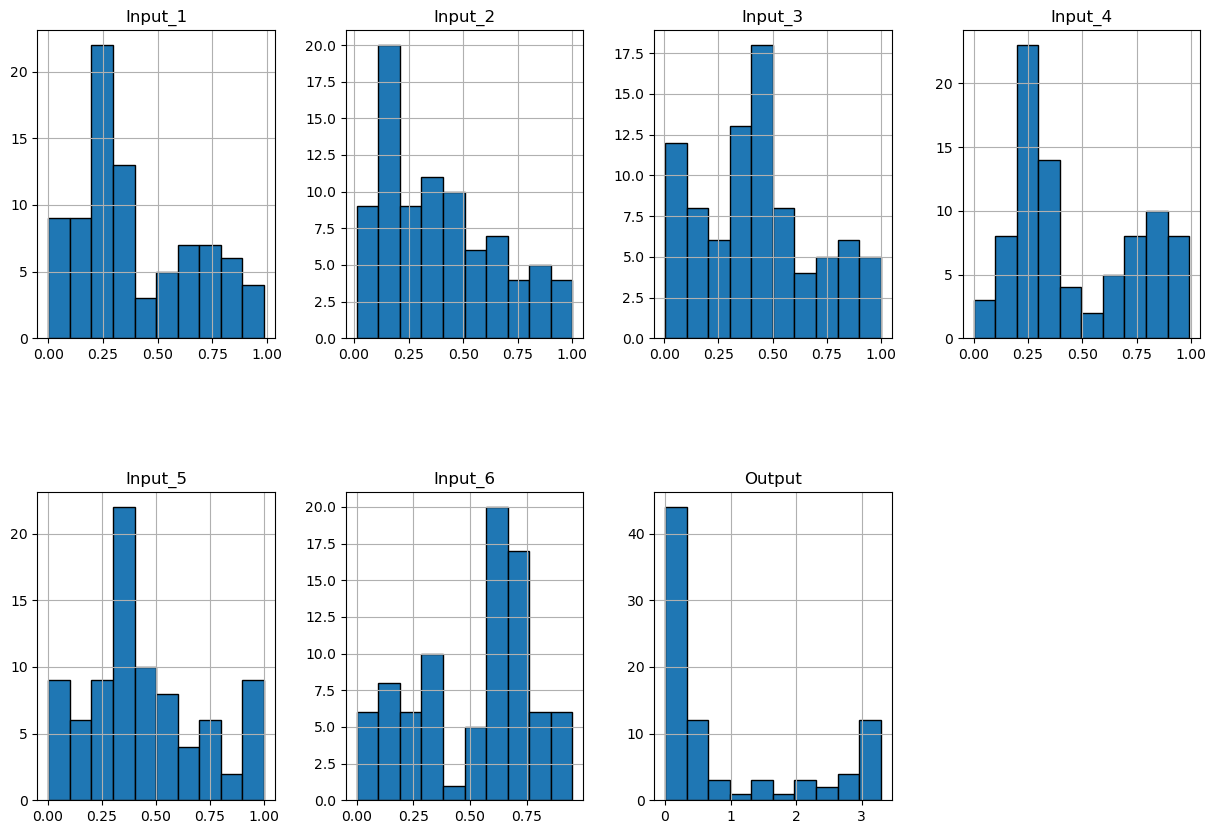

In [12]:
# Plot histograms for each column to understand distributions
df.hist(bins=10, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

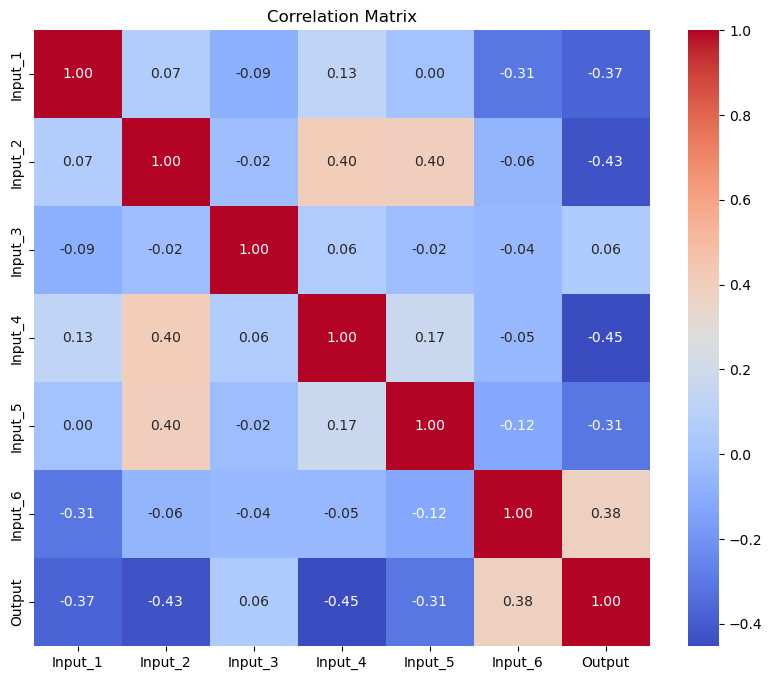

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

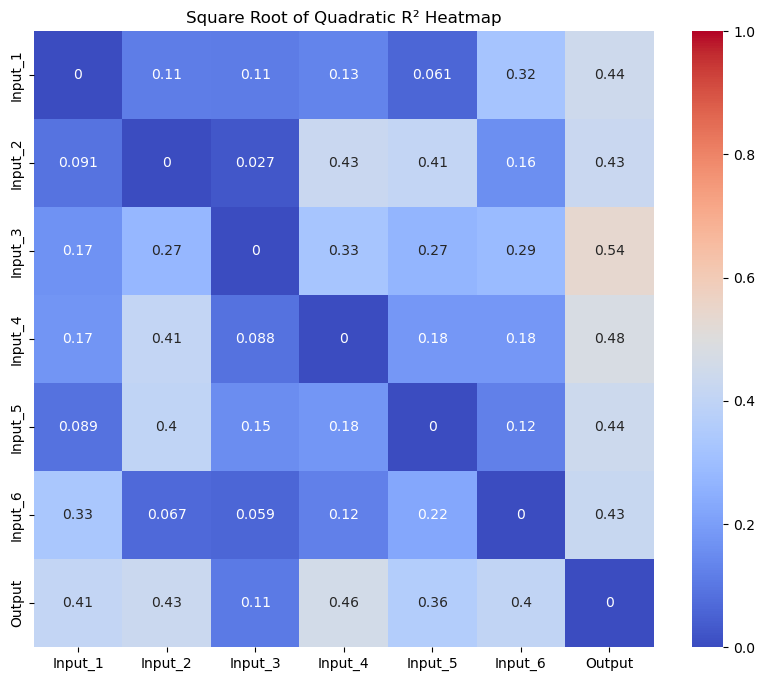

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_quadratic_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_quadratic_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)

/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


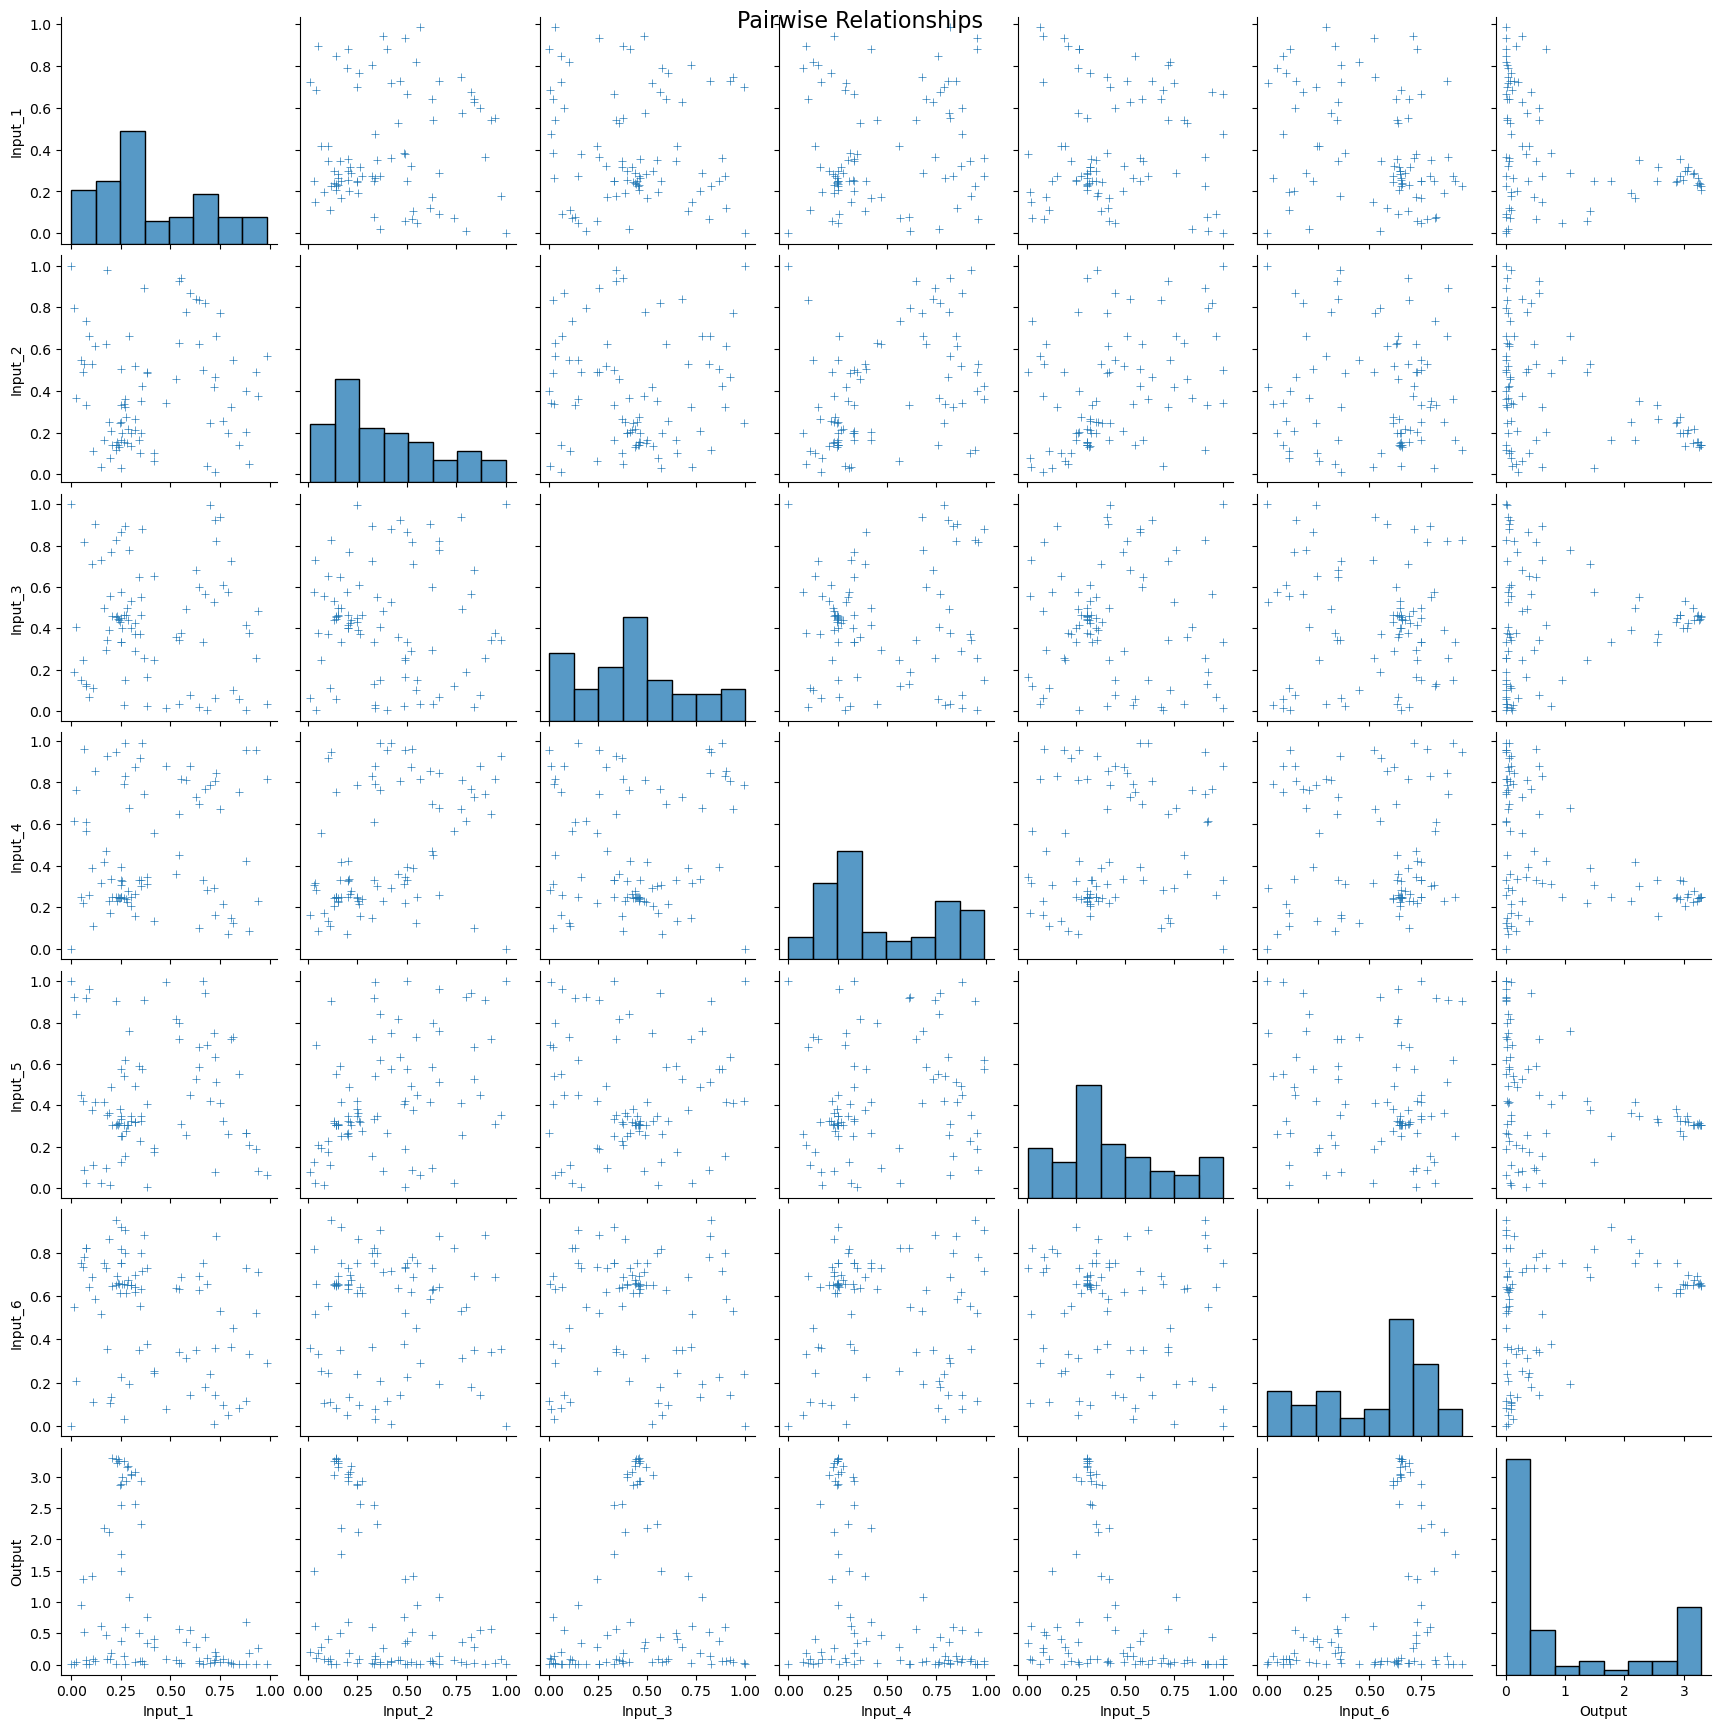

In [15]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## Tracking of potential queries, submissions and historical notes


#### 28 Apr. Ask 1. 
[0.250000-0.250000-0.450000-0.250000-0.350000-0.750000]

- En fase exploratoria con length scale de 0.2 y 0.3, noise entre e-4 y e-10. No cambio mucho

Mas exploratorio con length 0,3
Beta 1.96 [0.150000-0.250000-0.450000-0.250000-0.350000-0.750000]
Beta 2.6 [0.250000-0.250000-0.450000-0.250000-0.350000-0.750000]***

MAs cerca del maximo con length 0.1
Beta 1.96 [0.050000-0.450000-0.250000-0.150000-0.350000-0.750000]
Beta 2.6 [0.050000-0.550000-0.150000-0.250000-0.450000-0.750000]

Maximo actual 0.057896	0.491672	0.247422	0.218118	0.420428	0.730970	1.364968


#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.050000-0.550000-0.150000-0.250000-0.450000-0.750000]
- [0.250000-0.250000-0.450000-0.250000-0.350000-0.750000] ***

#### May 10
El *** encontro un maximo muy bueno.
- Siguiendo con Length 0.3
- Beta 2,6 [0.250000-0.166667-0.333334-0.250000-0.250000-0.916666] +++
- ONLY std [0.000001-0.999999-0.999999-0.000001-0.999999-0.000001]
- Con lengths 0.2
- B 2.6 [0.250000-0.333334-0.333334-0.333334-0.333334-0.750000]

#### May 14
+++ esta muy cerca del maximo en *** Asi que habrá que seguir explorando esa zona
- Length .3
-   Beta 1.96 [0.166667-0.166667-0.416667-0.333334-0.416667-0.666666]
-   Beta 2.6 [0.166667-0.166667-0.500000-0.416667-0.416667-0.750000]
-   Expected Improvement[0.333334-0.250000-0.416667-0.250000-0.333334-0.666666]
- Length .2
-   Beta 1.96 [0.166667-0.333334-0.416667-0.250000-0.333334-0.833333]
-   Beta 2.6 [0.250000-0.333334-0.416667-0.166667-0.250000-0.750000]
-   Expected Improvement[0.166667-0.250000-0.416667-0.250000-0.333334-0.750000]
- ******* Vamos por [0.166667-0.166667-0.500000-0.416667-0.416667-0.750000]

#### May 17
+++ seguir explorando
- **Length .3
- Beta 1.96 [0.350000-0.350000-0.550000-0.300000-0.350000-0.800000]+
- Beta CERO [0.250000-0.250000-0.450000-0.250000-0.350000-0.700000]
- Beta 2.6 [0.350000-0.350000-0.600000-0.350000-0.300000-0.800000]*
- **LEnght .2
- Beta 1.96 [0.200000-0.250000-0.400000-0.300000-0.450000-0.800000]
- Beta CERO [0.200000-0.250000-0.400000-0.300000-0.350000-0.750000]
- Beta 2.6 [0.200000-0.200000-0.350000-0.250000-0.450000-0.750000]*
- **Lenght .1
- Beta 1.96 [0.250000-0.250000-0.400000-0.300000-0.350000-0.800000]
- Beta CERO [0.250000-0.250000-0.400000-0.300000-0.350000-0.750000]
- Beta 2.6 [0.250000-0.250000-0.400000-0.350000-0.350000-0.750000]
- **EI
- [0.200000-0.250000-0.400000-0.300000-0.350000-0.750000]
- ** LogLikelihood
- Beta 1.96 [0.300000-0.250000-0.450000-0.250000-0.350000-0.650000]
- Beta CERO [0.300000-0.250000-0.450000-0.250000-0.350000-0.700000]
- Beta 2.6 [0.300000-0.200000-0.400000-0.250000-0.350000-0.650000]+++ (New max)
- query EI: [0.700000-0.400000-0.200000-0.800000-0.800000-0.800000]
- query PI: [0.750000-0.500000-0.250000-0.300000-0.800000-0.600000]

- ******* Vamos por [0.300000-0.200000-0.400000-0.250000-0.350000-0.650000] y [0.350000-0.350000-0.550000-0.300000-0.350000-0.800000]

#### 1 jun
+++ PURO LOG LIKELIHOOD
- Beta 1.96 [0.250000-0.250000-0.450000-0.250000-0.300000-0.600000]
- Beta casi CERO [0.300000-0.250000-0.400000-0.250000-0.350000-0.650000]
- Beta 2.6 [0.250000-0.250000-0.450000-0.250000-0.300000-0.600000]
+++ AJUSTANDOI RANGO MISMO PROCESO LOG LIK
- Beta 1.96 [0.275000-0.275000-0.425000-0.237500-0.312500-0.612500]
- Beta casi CERO [0.275000-0.237500-0.425000-0.237500-0.350000-0.650000]
- Beta 2.6 [0.275000-0.275000-0.462500-0.237500-0.275000-0.612500] +

****** VAMOS POR [0.275000-0.275000-0.462500-0.237500-0.275000-0.612500] Cerca del maximo

#### 7 jun
+++ Log Like
Beta 1.96 [0.333333-0.250000-0.416667-0.166667-0.333333-0.666667]
Beta CERO [0.250000-0.250000-0.416667-0.250000-0.333333-0.666667]
Beta 2.6 [0.250000-0.250000-0.416667-0.250000-0.416667-0.583333]
query EI: [0.666667-0.500000-0.333333-0.333333-1.000000-0.750000]++
query PI: [0.583333-0.500000-0.333333-0.333333-0.916667-0.666667]
+++ Log Like en rango 0.20-0.75
Beta 1.96 [0.245833-0.245833-0.429167-0.245833-0.383333-0.612500] +
casi CERO [0.291667-0.245833-0.429167-0.245833-0.337500-0.658333]
Beta 2.6 [0.245833-0.245833-0.429167-0.200000-0.383333-0.612500]
query EI: [0.750000-0.750000-0.750000-0.200000-0.750000-0.750000]
query PI: [0.750000-0.658333-0.245833-0.245833-0.750000-0.750000]

****** VAMOS POR 
+ [0.245833-0.245833-0.429167-0.245833-0.383333-0.612500]+ y 
++ [0.666667-0.500000-0.333333-0.333333-1.000000-0.750000]

#### 12 jun

- *Con scaler, sin afinar rango
- Beta 1.96 [0.336667-0.255000-0.418333-0.173333-0.336667-0.663333]
- casi CERO [0.336667-0.255000-0.418333-0.255000-0.336667-0.663333]

- *Con scaler afinando de 0 a 0.8
- Beta 1.96 [0.307692-0.246154-0.369231-0.123077-0.307692-0.676923]
- casi CERO [0.307692-0.246154-0.430769-0.246154-0.307692-0.676923]

- Con sclaer afinando de 0.05 a 0.75
- Beta 1.96 [0.319231-0.265385-0.373077-0.157692-0.319231-0.642308]
- casi CERO [0.319231-0.211538-0.426923-0.265385-0.319231-0.696154]

- *****Vamos por Cero y 1.96 de la ultima corrida
- Beta 1.96 [0.319231-0.265385-0.373077-0.157692-0.319231-0.642308] -bueno pero no tanto
- casi CERO [0.319231-0.211538-0.426923-0.265385-0.319231-0.696154] *** new max

#### 18 jun
Next query point UCB with Beta 1.96: [0.230770-0.230770-0.384616-0.307693-0.230770-0.615384]
Next query point UCB with Beta 0.01: [0.307693-0.230770-0.461539-0.307693-0.307693-0.692307]
Next query point UCB with Beta 1.0: [0.307693-0.230770-0.461539-0.307693-0.307693-0.692307]
Next query point UCB with Beta 2.6: [0.230770-0.153847-0.384616-0.307693-0.230770-0.615384]
Next query point UCB with Beta 4: [0.153847-0.153847-0.307693-0.307693-0.153847-0.615384]
Next query point EI: [0.615384-0.615384-0.153847-0.230770-0.846153-0.615384]
Next query point PI: [0.000001-0.999999-0.999999-0.000001-0.999999-0.000001]

Ajustando rangos a +/-10 o hasta donde Beta 4 indique
Next query point UCB with Beta 1.96: [0.254167-0.200000-0.400000-0.325000-0.250000-0.654167] ++ cerca de max
Next query point UCB with Beta 0.01: [0.295833-0.216667-0.425000-0.304167-0.300000-0.654167]
Next query point UCB with Beta 1.0: [0.275000-0.200000-0.425000-0.304167-0.275000-0.654167]
Next query point UCB with Beta 2.6: [0.212500-0.183334-0.375001-0.325000-0.225000-0.654167]
Next query point UCB with Beta 4: [0.150001-0.166667-0.325001-0.325000-0.175001-0.633334]
Next query point EI: [0.150001-0.349999-0.599999-0.449999-0.449999-0.550001]
Next query point PI: [0.150001-0.349999-0.599999-0.449999-0.449999-0.550001]

- ** Vamos por [0.254167-0.200000-0.400000-0.325000-0.250000-0.654167]


#### 22 jun
- todo el rango
Next query point UCB with Beta 1.96: [0.333334-0.166667-0.500000-0.250000-0.333334-0.666666]
Next query point UCB with Beta 0.01: [0.333334-0.166667-0.416667-0.333334-0.333334-0.666666]
Next query point UCB with Beta 1.0: [0.333334-0.166667-0.416667-0.333334-0.333334-0.666666]
Next query point UCB with Beta 2.6: [0.333334-0.083334-0.500000-0.250000-0.333334-0.666666]
Next query point UCB with Beta 4: [0.416667-0.000001-0.666666-0.083334-0.416667-0.666666]

- ajustando el rango
Next query point UCB with Beta 1.96: [0.354166-0.200000-0.466667-0.333333-0.325000-0.633334] ++
Next query point UCB with Beta 0.01: [0.295833-0.225000-0.437501-0.300000-0.295833-0.654167]
Next query point UCB with Beta 1.0: [0.325000-0.200000-0.466667-0.300000-0.295833-0.654167]
Next query point UCB with Beta 2.6: [0.354166-0.200000-0.466667-0.366666-0.325000-0.633334]
Next query point UCB with Beta 4: [0.383333-0.050001-0.641666-0.100001-0.383333-0.675000]

- ** Vamos por [0.354166-0.200000-0.466667-0.333333-0.325000-0.633334]

#### 24 jun

- todo el rango
Next query point UCB with Beta 1.96: [0.250000-0.166667-0.416667-0.250000-0.333334-0.666666]
Next query point UCB with Beta 0.01: [0.250000-0.166667-0.416667-0.250000-0.333334-0.666666]
Next query point UCB with Beta 1.0: [0.250000-0.166667-0.416667-0.250000-0.333334-0.666666]
Next query point UCB with Beta 2.6: [0.250000-0.166667-0.500000-0.250000-0.333334-0.666666]

-Rango acotado
Next query point UCB with Beta 1.96: [0.265000-0.195833-0.440001-0.277500-0.304167-0.664166]
Next query point UCB with Beta 0.01: [0.286667-0.216666-0.440001-0.277500-0.304167-0.673333] ++
Next query point UCB with Beta 1.0: [0.265000-0.195833-0.440001-0.277500-0.304167-0.664166]
Next query point UCB with Beta 2.6: [0.265000-0.154167-0.463334-0.246666-0.304167-0.655000] + ** new max

- ** vamos por [0.286667-0.216666-0.440001-0.277500-0.304167-0.673333] y [0.265000-0.154167-0.463334-0.246666-0.304167-0.655000]

#### 28 jun

- Todo el rango
Next query point UCB with Beta 1.96: [0.250000-0.166667-0.500000-0.250000-0.333334-0.666666]
Next query point UCB with Beta 0.01: [0.250000-0.166667-0.500000-0.250000-0.333334-0.666666]
Next query point UCB with Beta 1.0: [0.250000-0.166667-0.500000-0.250000-0.333334-0.666666]
Next query point UCB with Beta 2.6: [0.250000-0.083334-0.500000-0.166667-0.333334-0.666666]
Next query point UCB with Beta 4: [0.333334-0.000001-0.500000-0.083334-0.333334-0.666666]

- Solo rango acotado
Next query point UCB with Beta 1.96: [0.283334-0.150001-0.497500-0.223334-0.305000-0.650000] ++
Next query point UCB with Beta 0.01: [0.266667-0.150001-0.462500-0.241667-0.305000-0.650000] 
Next query point UCB with Beta 1.0: [0.266667-0.150001-0.480000-0.241667-0.305000-0.650000]
Next query point UCB with Beta 2.6: [0.300001-0.133334-0.532500-0.205001-0.322500-0.650000] +
Next query point UCB with Beta 4: [0.333334-0.100001-0.550000-0.150001-0.340000-0.666666]

- *** Vamos por [0.300001-0.133334-0.532500-0.205001-0.322500-0.650000] y [0.283334-0.150001-0.497500-0.223334-0.305000-0.650000]

#### 1 julio
Next query point UCB with Beta 0.01: [0.230770-0.153847-0.461539-0.230770-0.307693-0.692307] ++ cerca de max
Next query point UCB with Beta 1.0: [0.230770-0.153847-0.461539-0.230770-0.307693-0.692307]
Next query point UCB with Beta 1.96: [0.230770-0.153847-0.461539-0.230770-0.307693-0.692307]
Next query point UCB with Beta 2.6: [0.230770-0.076924-0.461539-0.230770-0.307693-0.615384]
Next query point UCB with Beta 4: [0.076924-0.000001-0.384616-0.076924-0.307693-0.615384]

- ** Vampos por [0.230770-0.153847-0.461539-0.230770-0.307693-0.692307]

#### 6 julio
Next query point UCB with Beta 0.01: [0.240001-0.150000-0.452000-0.244000-0.305333-0.656667]
Next query point UCB with Beta 1.0: [0.240001-0.130000-0.438000-0.244000-0.316000-0.656667] ++ new max
Next query point UCB with Beta 1.96: [0.226667-0.060001-0.424001-0.228000-0.326666-0.656667]
Next query point UCB with Beta 2.6: [0.226667-0.050001-0.424001-0.228000-0.337333-0.656667]
Next query point UCB with Beta 4: [0.160001-0.050001-0.396001-0.100001-0.316000-0.616667]

- ** Vamos por [0.240001-0.130000-0.438000-0.244000-0.316000-0.656667]

#### 9 julio

Next query point UCB with Beta 0.01: [0.237334-0.140000-0.443334-0.249333-0.306666-0.660000]
Next query point UCB with Beta 1.0: [0.237334-0.140000-0.443334-0.249333-0.306666-0.660000] ++
Next query point UCB with Beta 1.96: [0.205334-0.140000-0.462000-0.249333-0.306666-0.644000]
Next query point UCB with Beta 2.6: [0.226667-0.020001-0.415334-0.157334-0.315333-0.660000]
Next query point UCB with Beta 4: [0.120001-0.020001-0.406001-0.050001-0.315333-0.604001]

- ** Vamos por [0.237334-0.140000-0.443334-0.249333-0.306666-0.660000]

#### 13 julio
  
Next query point UCB with Beta 0.01: [0.237334-0.140000-0.443334-0.249333-0.306666-0.660000]
Next query point UCB with Beta 1.0: [0.226667-0.140000-0.452667-0.249333-0.306666-0.652000] ++ new max
Next query point UCB with Beta 1.96: [0.194667-0.140000-0.462000-0.249333-0.306666-0.644000]
Next query point UCB with Beta 2.6: [0.194667-0.020001-0.424667-0.157334-0.306666-0.644000]

- ** Vampos por [0.226667-0.140000-0.452667-0.249333-0.306666-0.652000]

- #### 15 julio

Next query point UCB with Beta 0.01: [0.216000-0.140000-0.452667-0.249333-0.306666-0.652000]
Next query point UCB with Beta 1.0: [0.205334-0.140000-0.462000-0.249333-0.306666-0.644000] ++
Next query point UCB with Beta 1.96: [0.173334-0.130000-0.462000-0.234000-0.306666-0.636000]
Next query point UCB with Beta 2.6: [0.120001-0.020001-0.471333-0.188000-0.341332-0.604001]

- ** Vamos por [0.205334-0.140000-0.462000-0.249333-0.306666-0.644000]

#### 20 julio

- Next query point UCB with Beta 0.01: [0.216000-0.150000-0.462000-0.264667-0.306666-0.652000]
Next query point UCB with Beta 1.0: [0.216000-0.140000-0.471333-0.280000-0.315333-0.652000] ++
Next query point UCB with Beta 1.96: [0.205334-0.110000-0.480667-0.280000-0.323999-0.644000]
Next query point UCB with Beta 2.6: [0.194667-0.070001-0.490000-0.280000-0.332666-0.644000]
Next query point UCB with Beta 4: [0.120001-0.150000-0.350001-0.172667-0.263334-0.620000]

- ** Vampos por [0.216000-0.140000-0.471333-0.280000-0.315333-0.652000]

# New model / with batch loop for prediction

In [27]:
# New model / with batch loop for prediction

import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-12, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999),   # Range for Input_4
    (0.000001, 0.999999),   # Range for Input_5
    (0.000001, 0.999999)   # Range for Input_6
    # Add more ranges for additional inputs if necessary
]

si=1
if si==1:
    #Activar para modificar (RECUERDA DESACTIVAR DESPUES)
    input_ranges = [
        (0.120001, 0.280000),  # Range for Input_1
        (0.020001, 0.170000),  # Range for Input_2
        (0.350001, 0.490000),   # Range for Input_3
        (0.050001, 0.280000),   # Range for Input_4
        (0.220001, 0.349999),   # Range for Input_5
        (0.580001, 0.699999)   # Range for Input_6
        # Add more ranges for additional inputs if necessary
    ]
    
# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

GG = 16  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

print("Grid done")

# Batch size for predictions
batch_size = 1000  # Adjust this size based on your memory capacity

# Predictions using the surrogate model in batches
mean_scaled_list = []
std_scaled_list = []

for i in range(0, X_grid_scaled.shape[0], batch_size):
    batch_end = i + batch_size
    X_batch = X_grid_scaled[i:batch_end]
    mean_batch, std_batch = GPR_model_best.predict(X_batch, return_std=True)
    mean_scaled_list.append(mean_batch)
    std_scaled_list.append(std_batch)

# Concatenate all batches
mean_scaled = np.concatenate(mean_scaled_list, axis=0).reshape(-1, 1)
std_scaled = np.concatenate(std_scaled_list, axis=0)

# Inverse transform the mean predictions
mean = scaler_y.inverse_transform(mean_scaled).flatten()
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 0.01', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([1.00, 1.96, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")


Best length scale: 0.4050920359864391
Best noise level: 1e-12
Grid done
Next query point UCB with Beta 0.01: [0.216000-0.150000-0.462000-0.264667-0.306666-0.652000]
Next query point UCB with Beta 1.0: [0.216000-0.140000-0.471333-0.280000-0.315333-0.652000]
Next query point UCB with Beta 1.96: [0.205334-0.110000-0.480667-0.280000-0.323999-0.644000]
Next query point UCB with Beta 2.6: [0.194667-0.070001-0.490000-0.280000-0.332666-0.644000]
Next query point UCB with Beta 4: [0.120001-0.150000-0.350001-0.172667-0.263334-0.620000]


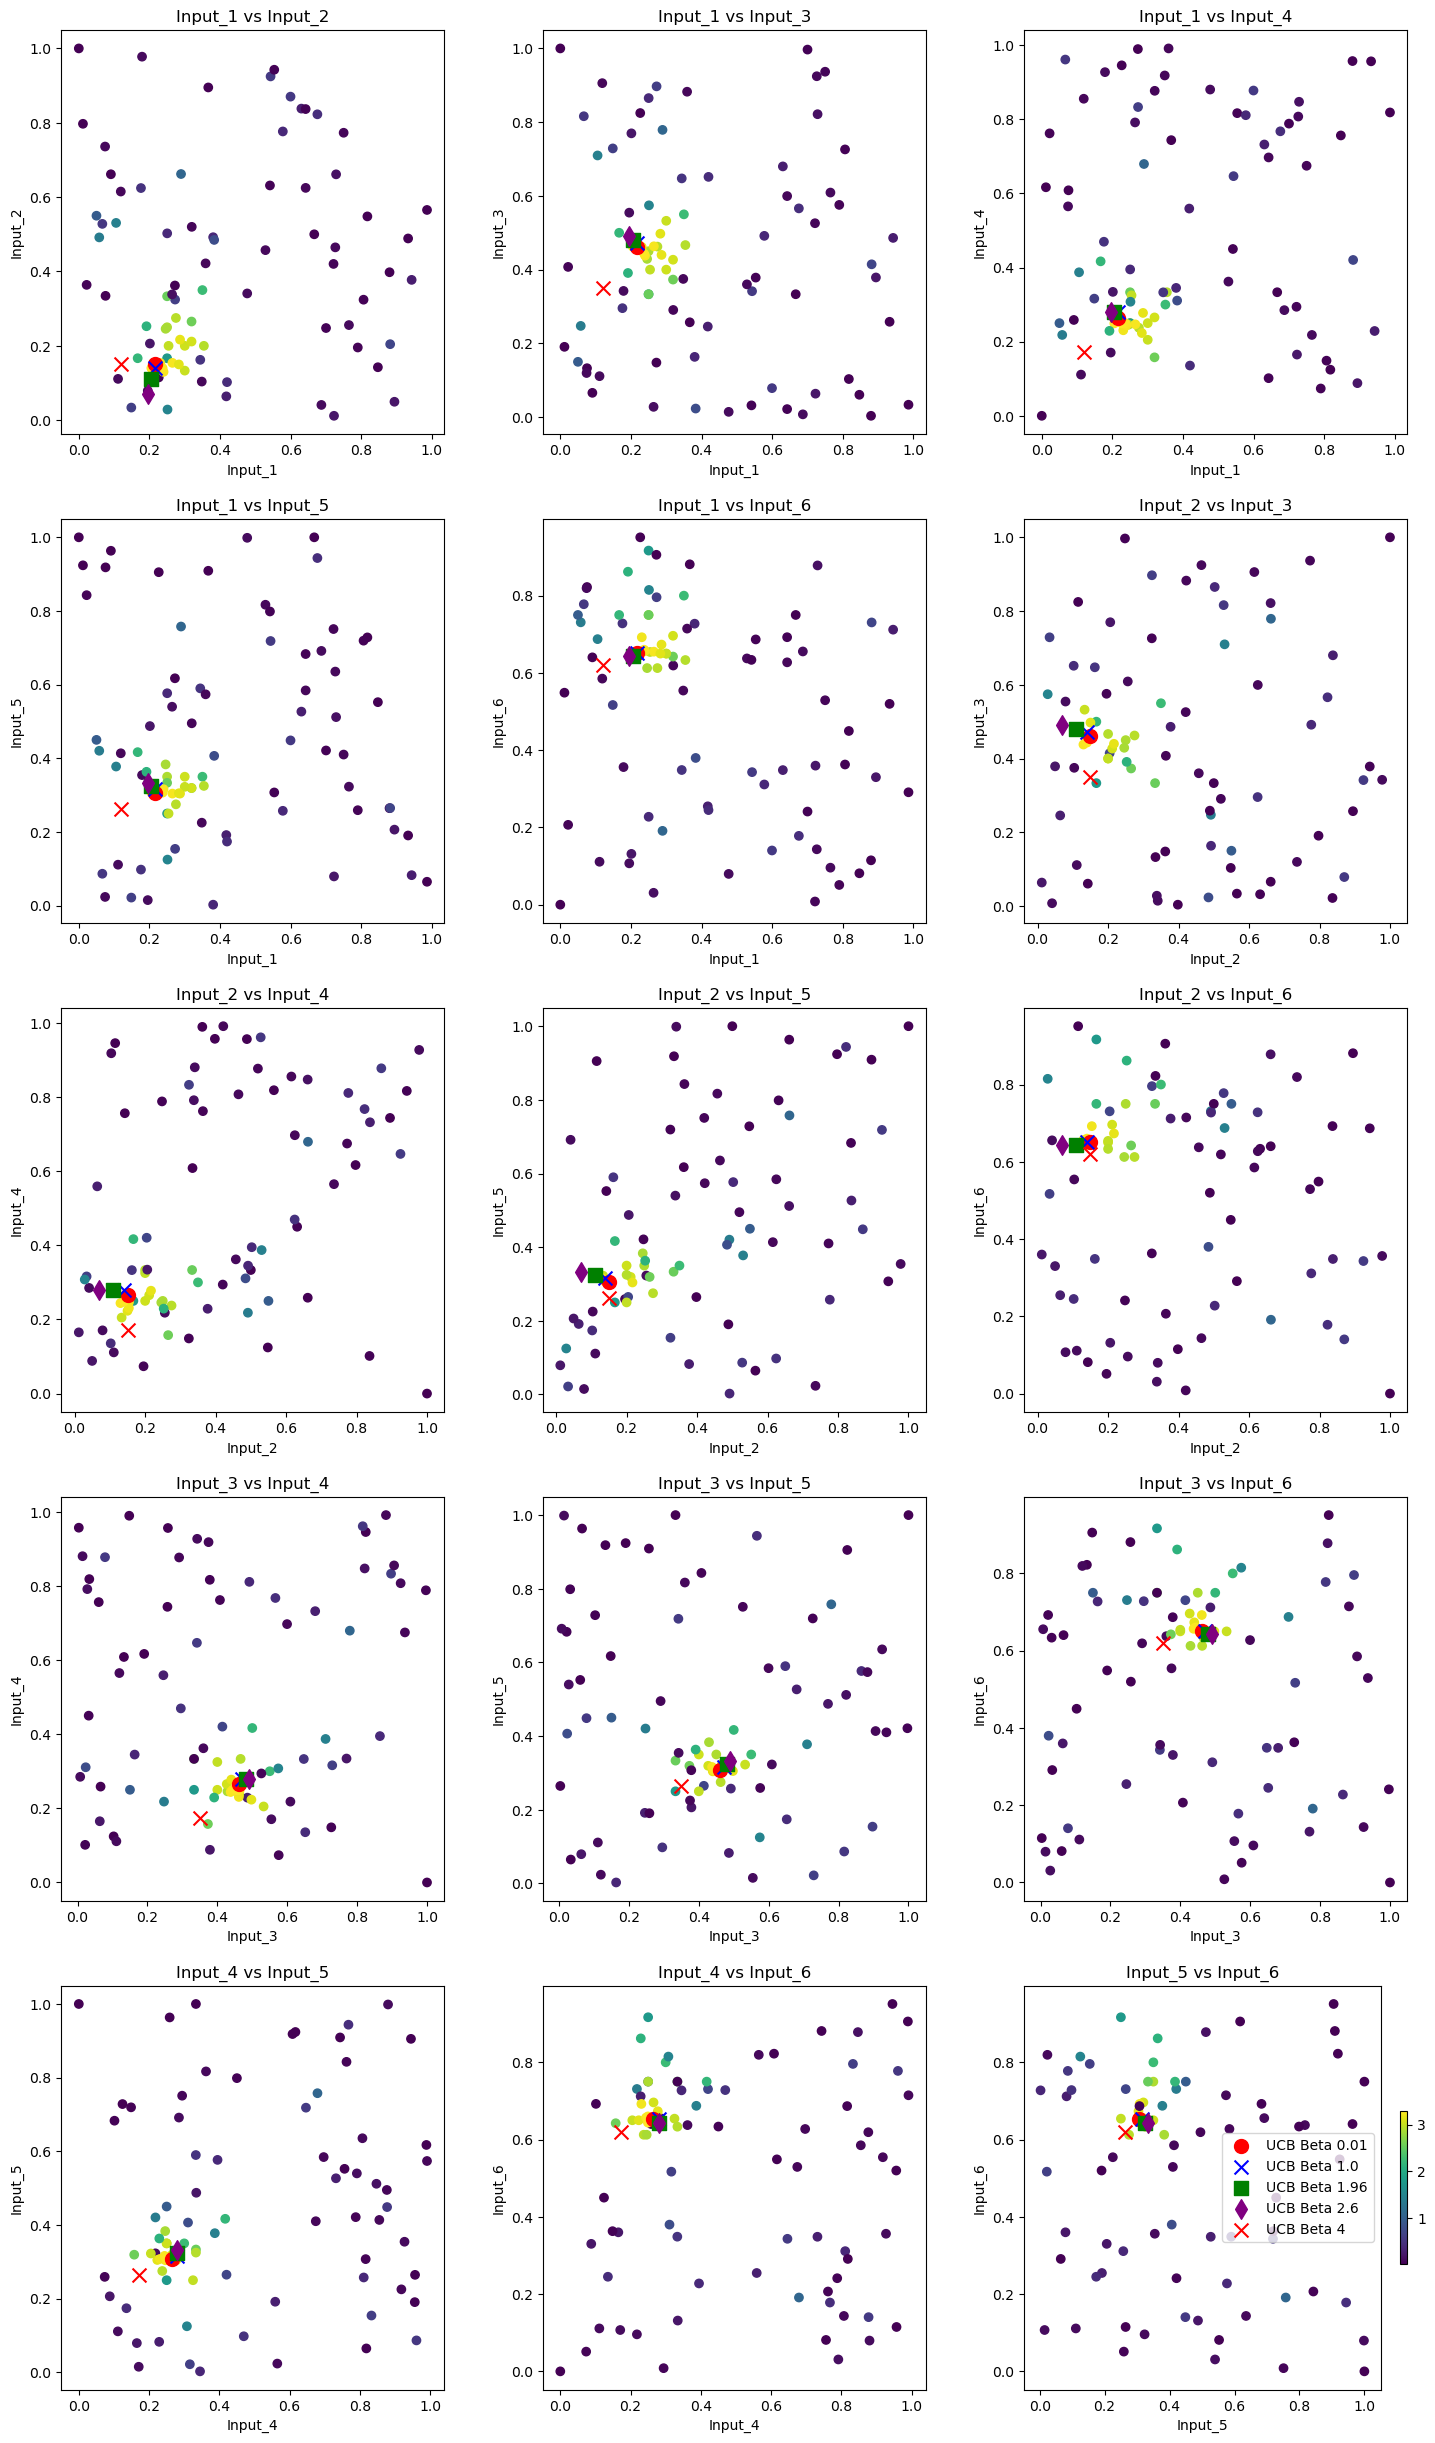

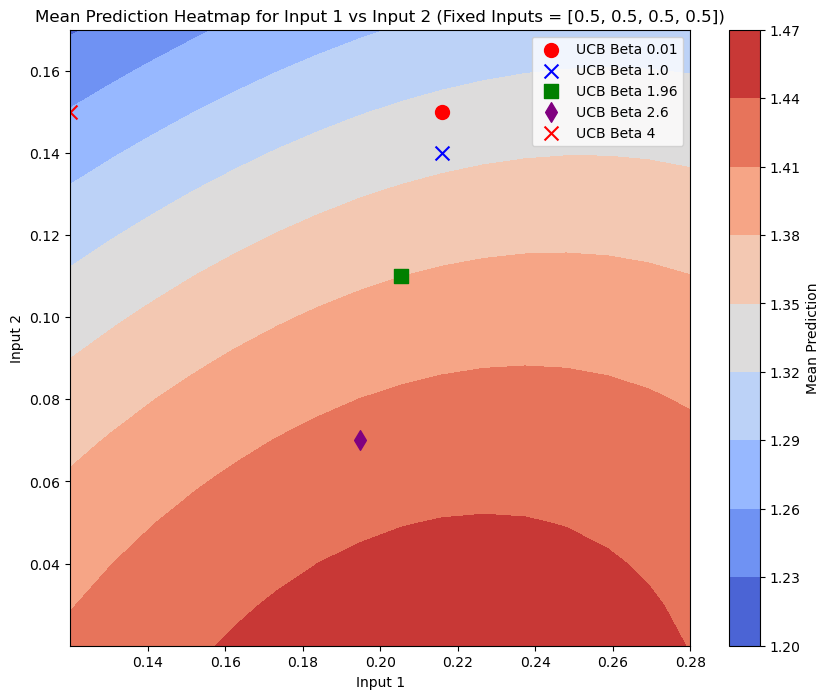

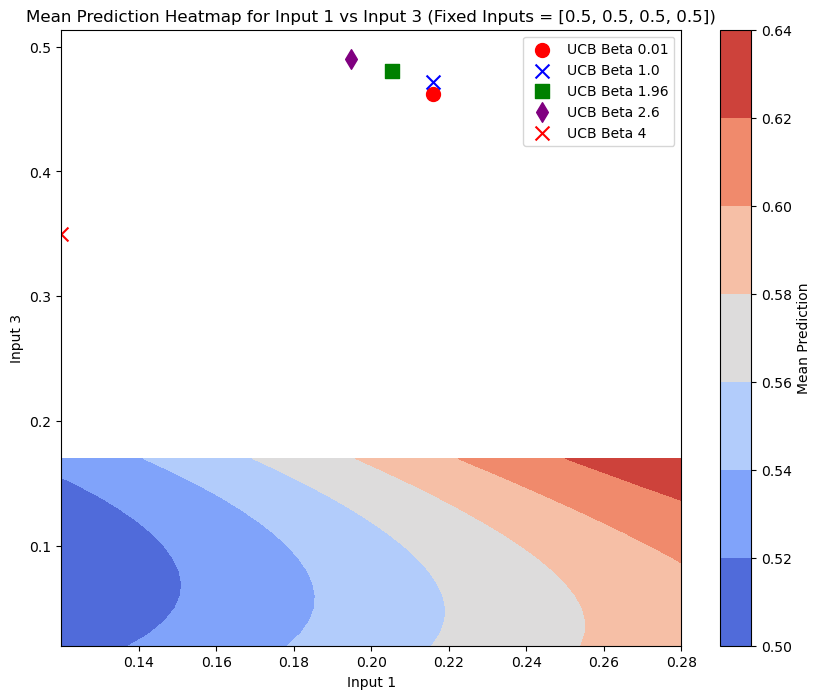

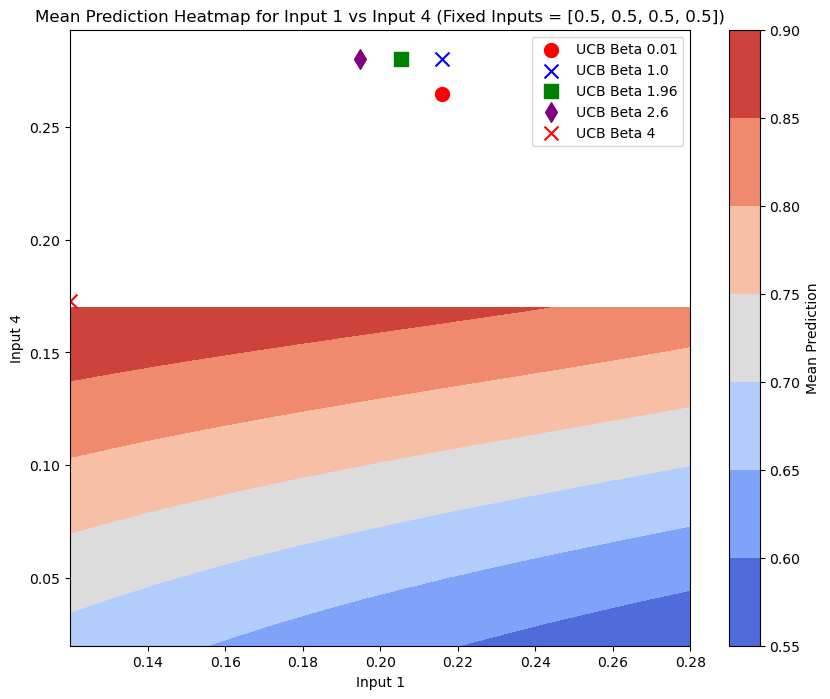

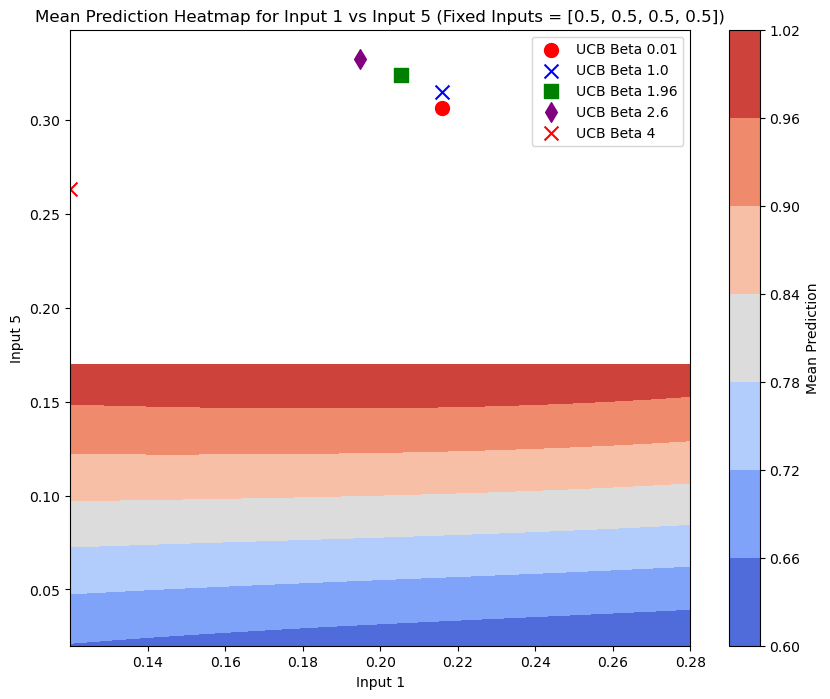

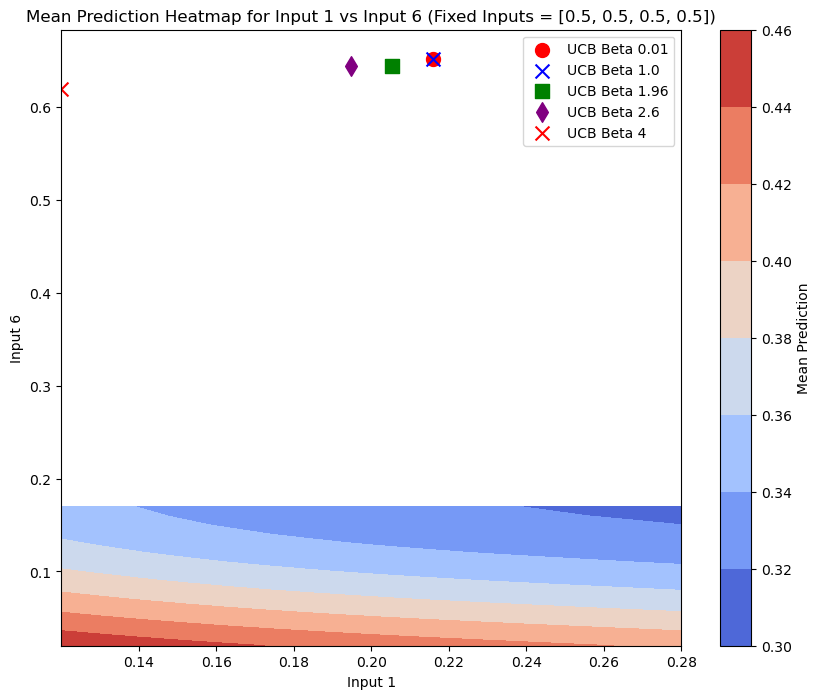

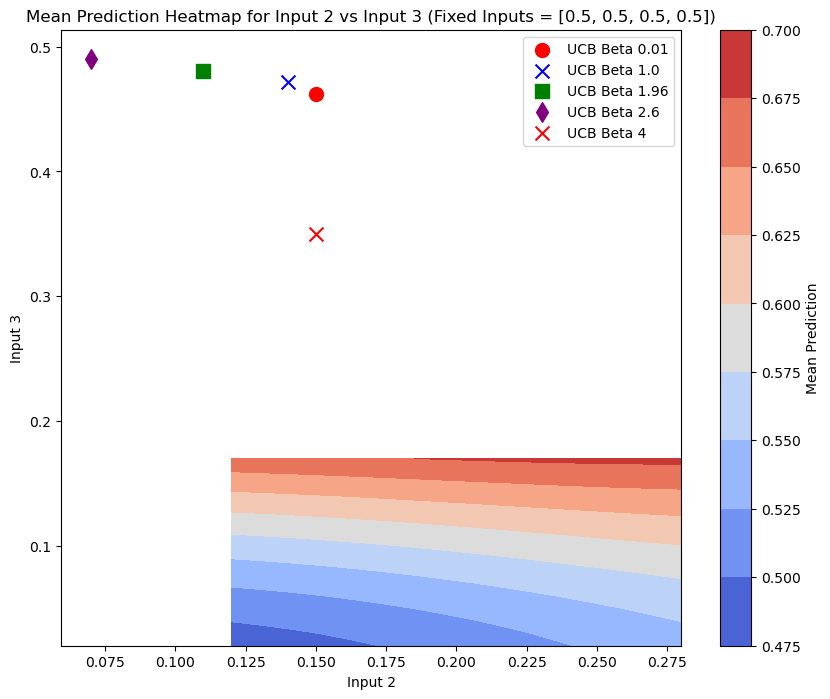

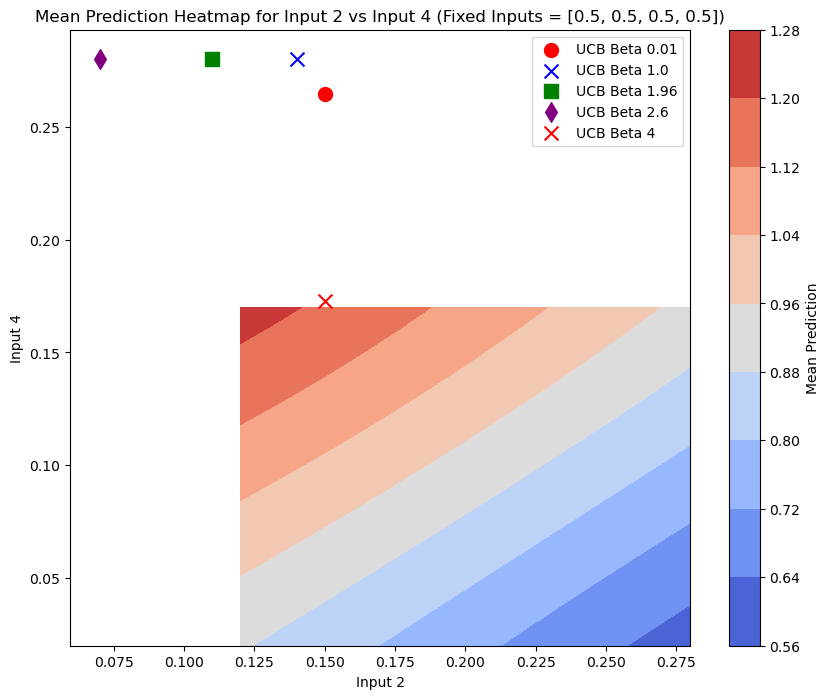

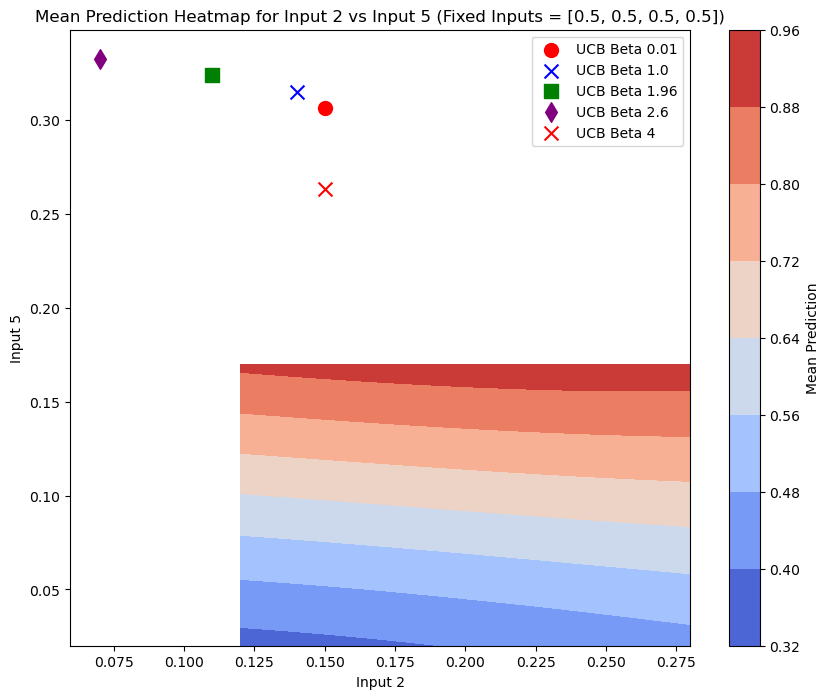

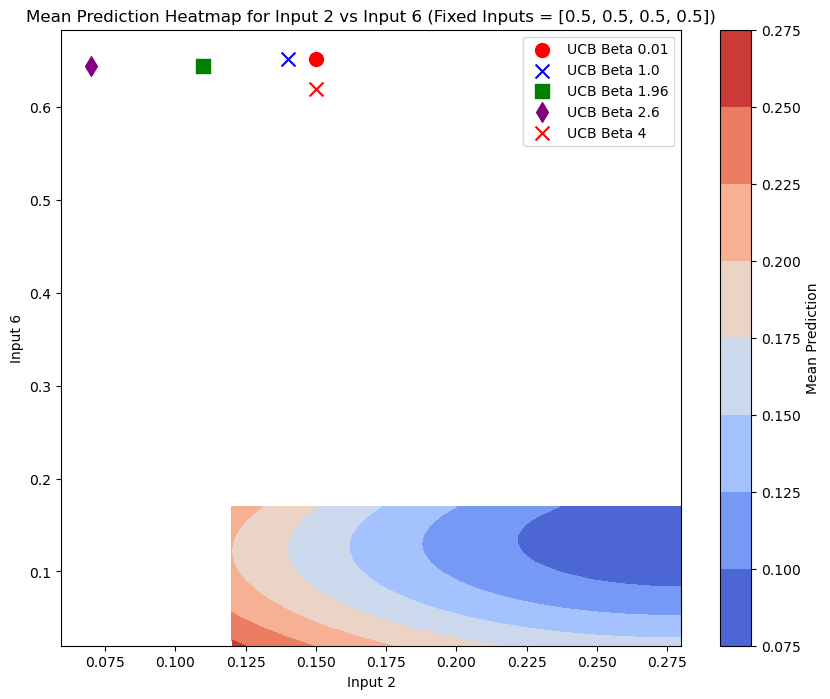

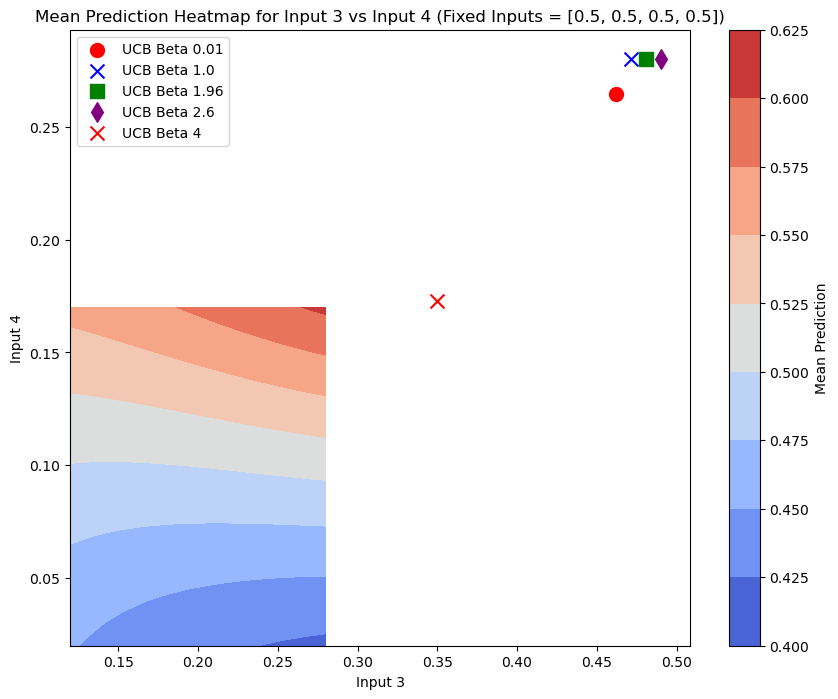

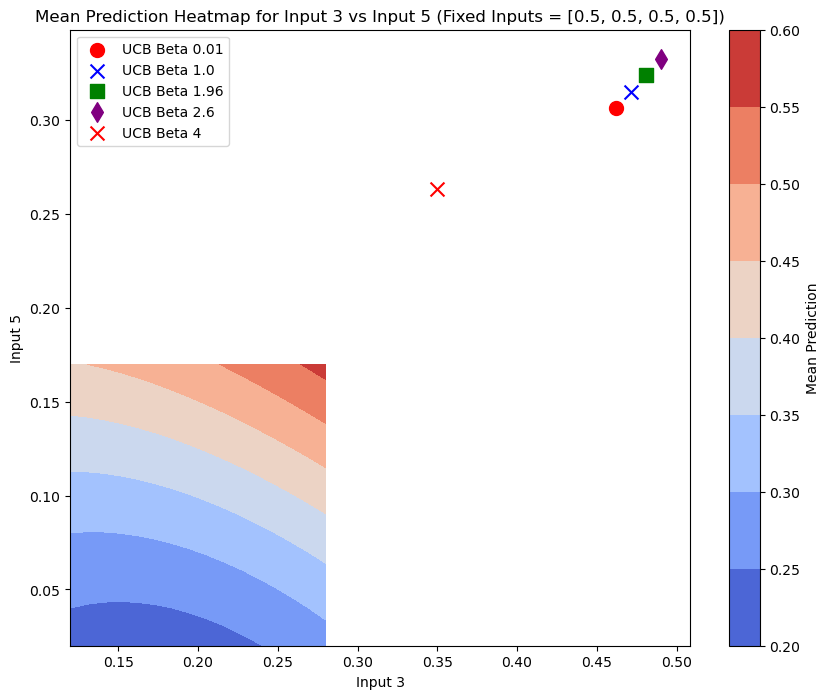

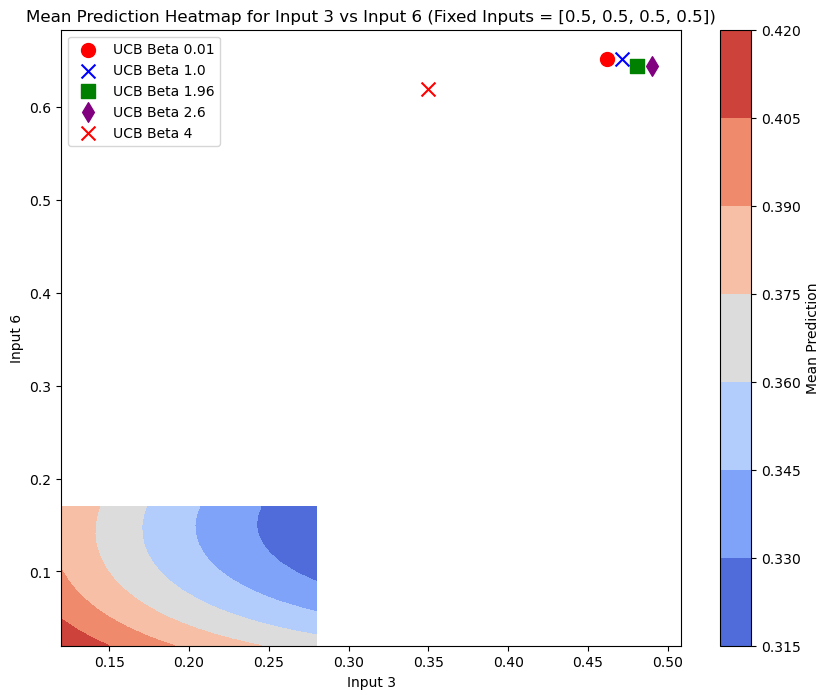

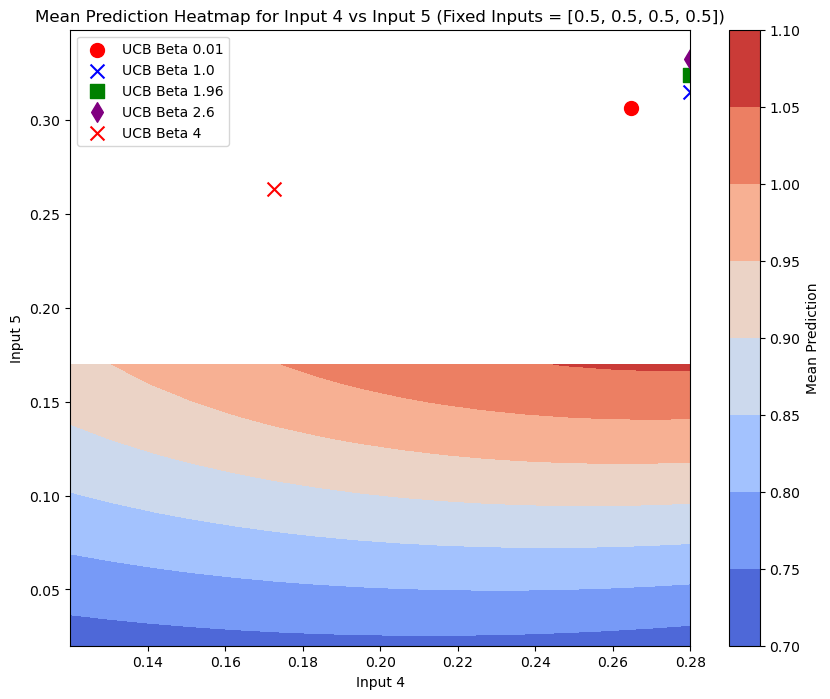

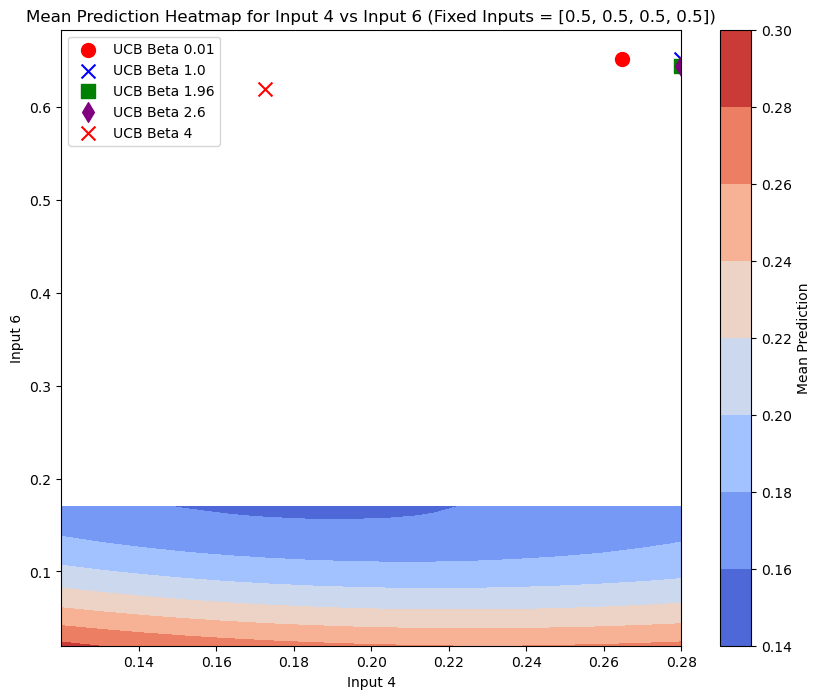

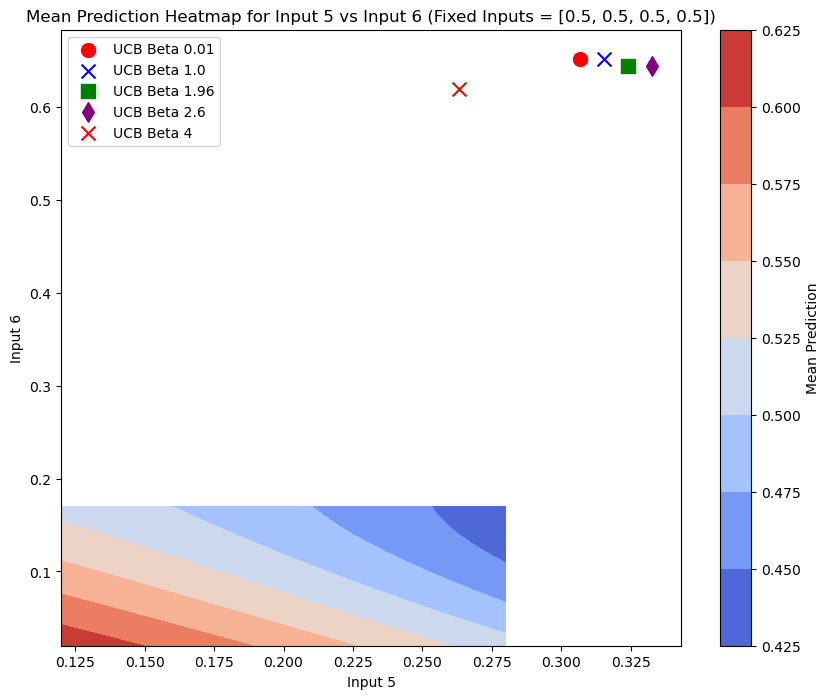

In [28]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)

# ******** OLD ********************************************************************

# New model (Without batch optimization, keep it just in case)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-1, name='length_scale'),
    Real(1e-15, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999),   # Range for Input_4
    (0.000001, 0.999999),   # Range for Input_5
    (0.000001, 0.999999)   # Range for Input_6
    # Add more ranges for additional inputs if necessary
]

si=0
if si==1:
    #Activar para modificar (RECUERDA DESACTIVAR DESPUES)
    input_ranges = [
        (0.200001, 0.400000),  # Range for Input_1
        (0.100001, 0.300000),  # Range for Input_2
        (0.340001, 0.5499999),   # Range for Input_3
        (0.150001, 0.369999),   # Range for Input_4
        (0.200001, 0.409999),   # Range for Input_5
        (0.550001, 0.749999)   # Range for Input_6
        # Add more ranges for additional inputs if necessary
    ]

        
# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 14  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

# Use other acquisition functions
#acquisition_function_ei = gaussian_ei(X_grid_scaled, model=GPR_model_best, xi=0.01)
#idx_max_ei = np.argmax(acquisition_function_ei)
#next_query_ei = X_grid[idx_max_ei]
#query_points.append((next_query_ei, 'EI', 'orange', 'v'))
#formatted_row_ei = '-'.join(format(x, ".6f") for x in next_query_ei)
#print(f"Next query point EI: [{formatted_row_ei}]")

#acquisition_function_pi = gaussian_pi(X_grid_scaled, model=GPR_model_best, xi=0.01)
#idx_max_pi = np.argmax(acquisition_function_pi)
#next_query_pi = X_grid[idx_max_pi]
#query_points.append((next_query_pi, 'PI', 'cyan', '^'))
#formatted_row_pi = '-'.join(format(x, ".6f") for x in next_query_pi)
#print(f"Next query point PI: [{formatted_row_pi}]")


Best length scale: 0.06687917000182016
Best noise level: 5.646524349626711e-05


In [ ]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)